<a href="https://colab.research.google.com/github/sajjad-abidi/FAST-AI-Wildlife-Image-Classifier/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=eb443ba3e0e848a92da9e886300dbd2f3ad7546a92e7f3ec6a11ee749ca016ff
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [42]:
from fastai.vision.all import *
from utils import *
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rc('image', cmap='Greys')

In [43]:
wild = r'wild animal images'

In [44]:
animal = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [45]:
dls = animal.dataloaders(wild)

In [46]:
animal = animal.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = animal.dataloaders(wild)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 46.4MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.135746,0.075379,0.023256,04:33


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.129978,0.052175,0.011628,06:40
1,0.106963,0.080757,0.014535,06:33
2,0.078087,0.057874,0.014535,06:50
3,0.057677,0.052311,0.011628,06:43


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

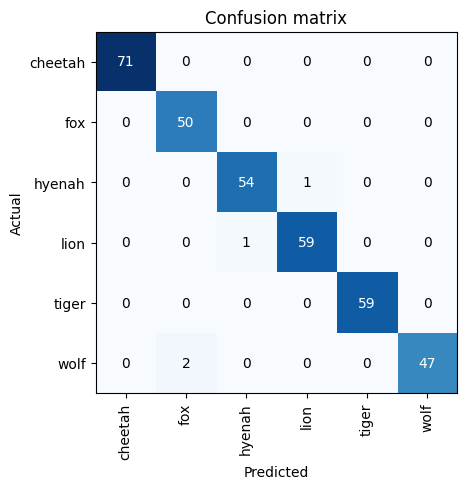

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

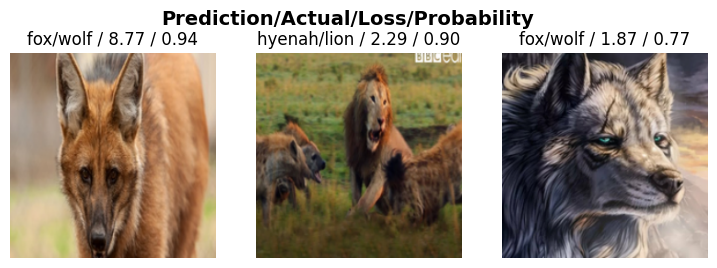

In [47]:
interp.plot_top_losses(3, nrows=1)

In [15]:
learn.export()

In [16]:
wild = Path()
wild.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [17]:
learn_inf = load_learner(wild/'export.pkl')

In [18]:
learn_inf.predict('wild animal images/wolf/00000509_224resized.png')

('wolf',
 tensor(5),
 tensor([3.3605e-07, 3.0886e-07, 2.6757e-06, 1.2180e-03, 2.0815e-08, 9.9878e-01]))

In [19]:
learn_inf.dls.vocab

['cheetah', 'fox', 'hyenah', 'lion', 'tiger', 'wolf']

In [48]:
import ipywidgets as widgets

In [51]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

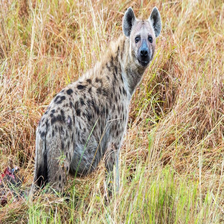

In [52]:
img = PILImage.create(btn_upload.data[0])
img

In [53]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [54]:
pred,pred_idx,probs = learn_inf.predict(img)

In [55]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: hyenah; Probability: 1.0000')

In [57]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [58]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [59]:
btn_upload = widgets.FileUpload()

In [60]:
vbox_layout = widgets.VBox([widgets.Label('Select your animal!'), btn_upload, btn_run, out_pl, lbl_pred])


display(vbox_layout)